# Python API Homework 

Observations:

•	There are three climate zones.  When I overlapped them on my charts it helped to visualize the patterns.  The Tropical Zone is 23.5 to -23.5, the Temperate Zone is 23.5 to 66.5 and -23.5 to -66.5, and finally the Polar Zone is 66.5 to 90 and -66.5 to -90.  Temperature is a perfect curve along the line with the highest temperatures along the equator and falling as you head North or South.  So the closer to the equator you are, the warmer the temperature.

•	There is no clustering or pattern of wind speed around the equator.  The data seems to prove out the Coriolis Effect, such that the latitude will impact the direction of the wind, but not the speed of the wind.

•	Cloud cover is strictly an observed event.  The graph is patterned heavily along specific percentages assigned by an observer.  This chart shows that while the latitude does not impact level of cloudiness, the observers bias toward percentages is very strong.


In [1]:
# Dependencies
import random
import json
import requests as req
from citipy import citipy
from key_vault import ow_api_key
import pandas as pd
from random import uniform
import matplotlib.pyplot as plt
import csv
from time import strftime, localtime

In [2]:
# set parameters and build partial url for api requests
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + ow_api_key + "&units=" + units + "&q="

In [3]:
#This section of code sets up the dataframe by randomly selecting lat/lon finding the nearest city and dropping duplicates

city_num = 1500

data_df= {}
data_df=pd.DataFrame(data_df)
data_df["City"]= ' '
data_df["Country"]= ' '
data_df["lat"]= ' '
data_df["lon"]= ' '
data_df["Temp"]= ' '
data_df["Temp_Min"]= ' '
data_df["Temp_Max"]= ' '
data_df["Humidity"] = ' '
data_df["Cloud"] = ' '
data_df["Wind_Speed"]= ' '


for index in range(0, city_num):
    x, y = uniform(-180,180), uniform(-90, 90)
    data_df.set_value(index, "lat", y)
    data_df.set_value(index, "lon", x)
    data_df.set_value(index, "City", citipy.nearest_city(y,x).city_name)
    data_df.set_value(index, "Country", citipy.nearest_city(y,x).country_code)

data_df= data_df.drop_duplicates("City")    
data_df = data_df.reset_index(drop=True)
data_df.head(10)   

,City,Country,lat,lon,Temp,Temp_Min,Temp_Max,Humidity,Cloud,Wind_Speed
0,vaini,to,-82.907,-178.717,NaN,NaN,NaN,NaN,NaN,NaN
1,hami,cn,43.9244,93.4148,NaN,NaN,NaN,NaN,NaN,NaN
2,ushuaia,ar,-78.253,-18.9077,NaN,NaN,NaN,NaN,NaN,NaN
3,rikitea,pf,-21.1671,-139.933,NaN,NaN,NaN,NaN,NaN,NaN
4,hermanus,za,-39.7265,18.2181,NaN,NaN,NaN,NaN,NaN,NaN
5,dikson,ru,77.4484,72.1998,NaN,NaN,NaN,NaN,NaN,NaN
6,lahad datu,my,5.02743,117.901,NaN,NaN,NaN,NaN,NaN,NaN
7,torbay,ca,47.2083,-44.2467,NaN,NaN,NaN,NaN,NaN,NaN
8,atuona,pf,8.10021,-131.879,NaN,NaN,NaN,NaN,NaN,NaN
9,takapau,nz,-40.2327,176.424,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#This section of code executes the api requests from open weather. For all of the cities, it will replace the 
#estimated lat/lon with actual lat/lon and load the data into the dataframe.  lastly, it drops cities that are
#not in open weather.
print("API pull started at :" + strftime("%a, %d %b %Y %H:%M:%S ", localtime()))
weather_data = []
for index in range (0, len(data_df["City"])):
    weather_data= req.get(query_url + data_df.iloc[index,0] + ',' + data_df.iloc[index,1]).json()
    print("Now retrieving " + data_df.iloc[index,0] +", " + " city # " + str(index) )
    try:
        data_df.set_value(index, "lat",weather_data['coord']['lat'])
        data_df.set_value(index, "lon",weather_data['coord']['lon'])
        data_df.set_value(index, "Temp",weather_data['main']['temp'])
        data_df.set_value(index, "Humidity",weather_data['main']['humidity'])
        data_df.set_value(index, "Temp_Min",weather_data['main']['temp_min'])
        data_df.set_value(index, "Temp_Max",weather_data['main']['temp_max'])
        data_df.set_value(index, "Wind_Speed",weather_data['wind']['speed'])
        data_df.set_value(index, "Cloud", weather_data['clouds']['all'])
        
    except KeyError: continue
print("API pull ended at :" + strftime("%a, %d %b %Y %H:%M:%S ", localtime()))        

API pull started at :Mon, 20 Nov 2017 11:11:11 
Now retrieving vaini,  city # 0
Now retrieving hami,  city # 1
Now retrieving ushuaia,  city # 2
Now retrieving rikitea,  city # 3
Now retrieving hermanus,  city # 4
Now retrieving dikson,  city # 5
Now retrieving lahad datu,  city # 6
Now retrieving torbay,  city # 7
Now retrieving atuona,  city # 8
Now retrieving takapau,  city # 9
Now retrieving rio gallegos,  city # 10
Now retrieving hobart,  city # 11
Now retrieving lebu,  city # 12
Now retrieving bredasdorp,  city # 13
Now retrieving coquimbo,  city # 14
Now retrieving yellowknife,  city # 15
Now retrieving tecoanapa,  city # 16
Now retrieving ha tinh,  city # 17
Now retrieving leningradskiy,  city # 18
Now retrieving butaritari,  city # 19
Now retrieving soyo,  city # 20
Now retrieving puerto ayora,  city # 21
Now retrieving severo-kurilsk,  city # 22
Now retrieving bluff,  city # 23
Now retrieving jamestown,  city # 24
Now retrieving zhuanghe,  city # 25
Now retrieving bakaly,  ci

Now retrieving ozernovskiy,  city # 223
Now retrieving prince albert,  city # 224
Now retrieving galle,  city # 225
Now retrieving srednekolymsk,  city # 226
Now retrieving hamilton,  city # 227
Now retrieving worthington,  city # 228
Now retrieving miedzychod,  city # 229
Now retrieving warri,  city # 230
Now retrieving brownsville,  city # 231
Now retrieving banja koviljaca,  city # 232
Now retrieving inverell,  city # 233
Now retrieving chuy,  city # 234
Now retrieving port lincoln,  city # 235
Now retrieving bethel,  city # 236
Now retrieving bluefield,  city # 237
Now retrieving tambaliza,  city # 238
Now retrieving barentsburg,  city # 239
Now retrieving svetlogorsk,  city # 240
Now retrieving bac lieu,  city # 241
Now retrieving antofagasta,  city # 242
Now retrieving curup,  city # 243
Now retrieving kavaratti,  city # 244
Now retrieving saint john,  city # 245
Now retrieving maba,  city # 246
Now retrieving mezen,  city # 247
Now retrieving husavik,  city # 248
Now retrieving 

Now retrieving thinadhoo,  city # 445
Now retrieving port blair,  city # 446
Now retrieving kloulklubed,  city # 447
Now retrieving dunedin,  city # 448
Now retrieving fara in sabina,  city # 449
Now retrieving tucuma,  city # 450
Now retrieving miraflores,  city # 451
Now retrieving marsa matruh,  city # 452
Now retrieving celestun,  city # 453
Now retrieving mutare,  city # 454
Now retrieving pindiga,  city # 455
Now retrieving magna,  city # 456
Now retrieving nouadhibou,  city # 457
Now retrieving sorland,  city # 458
Now retrieving tumannyy,  city # 459
Now retrieving gohpur,  city # 460
Now retrieving toppenish,  city # 461
Now retrieving hailar,  city # 462
Now retrieving show low,  city # 463
Now retrieving mahanoro,  city # 464
Now retrieving invermere,  city # 465
Now retrieving san rafael del sur,  city # 466
Now retrieving arlit,  city # 467
Now retrieving lunel,  city # 468
Now retrieving tefe,  city # 469
Now retrieving guatire,  city # 470
Now retrieving bar bigha,  city

In [5]:
#final data cleanup, dropping Cities not in the Weather database and resetting the index
data_df= data_df.dropna()
data_df = data_df.reset_index(drop=True)

In [6]:
#save the DataFrame to a csv file
data_df.to_csv("Global_Weather_Data.csv", encoding= 'utf-8', index = False)
data_df

,City,Country,lat,lon,Temp,Temp_Min,Temp_Max,Humidity,Cloud,Wind_Speed
0,vaini,to,-21.2,-175.2,75.2,75.2,75.2,100,40,6.2
1,hami,cn,42.8,93.45,15.05,15.05,15.05,67,0,0.72
2,ushuaia,ar,-54.8,-68.3,41,41,41,65,75,26.4
3,rikitea,pf,-23.12,-134.97,73.64,73.64,73.64,100,44,20.07
4,hermanus,za,-34.42,19.23,63.56,63.56,63.56,58,68,10.22
5,dikson,ru,73.51,80.55,4.92,4.92,4.92,100,12,17.83
6,lahad datu,my,5.03,118.33,75.89,75.89,75.89,100,8,3.62
7,torbay,ca,47.67,-52.73,54.41,50,59,87,90,11.41
8,atuona,pf,-9.8,-139.03,79.62,79.62,79.62,100,92,14.25
9,takapau,nz,-40.03,176.35,51.5,51.5,51.5,89,88,5.08


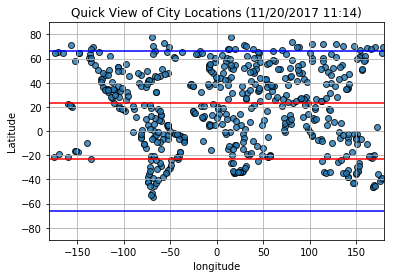

In [7]:
#scatter plot of the lat/lon in the dataframe to verify distribution, should resemble a map

plt.scatter(data_df["lon"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"Quick View of City Locations ({strftime('%m/%d/%Y %H:%M', localtime())})")
plt.ylabel("Latitude")
plt.xlabel("longitude")
plt.grid(True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')

# Save the figure
plt.savefig("Ploting_graph_of_Cities.png")

# Show plot
plt.show()


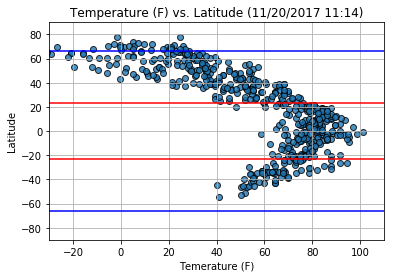

In [8]:
# Build a scatter plot for Temerature ranges along different Latitudes 
plt.scatter(data_df["Temp"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title(f"Temperature (F) vs. Latitude ({strftime('%m/%d/%Y %H:%M', localtime())})")
plt.ylabel("Latitude")
plt.xlabel("Temerature (F)")
plt.grid(True)
plt.xlim([data_df['Temp'].min() - 5, data_df['Temp'].max() + 5])
plt.xlim([-30, 110])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')

# Save the figure
plt.savefig("Temp_Latitude.png")

# Show plot
plt.show()

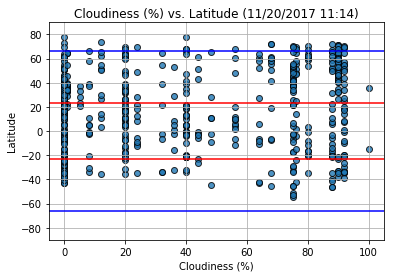

In [9]:
# Build a scatter plot for Cloud cover along different Latitudes 
plt.scatter(data_df["Cloud"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title(f"Cloudiness (%) vs. Latitude ({strftime('%m/%d/%Y %H:%M', localtime())})")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-5, 105])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()


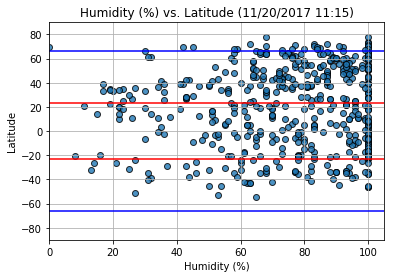

In [10]:
# Build a scatter plot for Humidity % along different Latitudes 
plt.scatter(data_df["Humidity"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title(f"Humidity (%) vs. Latitude ({strftime('%m/%d/%Y %H:%M', localtime())})")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.xlim([0, 105])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')
# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()



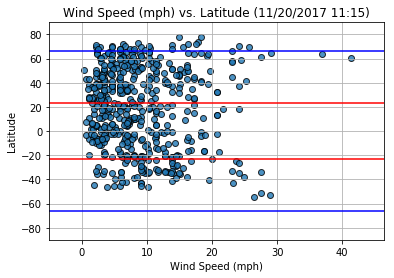

In [11]:
# Build a scatter plot for Wind Speeds along different Latitudes 
plt.scatter(data_df["Wind_Speed"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title(f"Wind Speed (mph) vs. Latitude ({strftime('%m/%d/%Y %H:%M', localtime())})")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-5, data_df['Wind_Speed'].max() + 5])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')
# Save the figure
plt.savefig("Wind_Speed_Latitude.png")

# Show plot
plt.show()
